In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from detrend import detrend

In [2]:
sns.set_theme()
## Lecture des données
data_folder = "../data"
stock_name = "AAPL"
df = pd.read_csv(
    f"{data_folder}/{stock_name}.csv", parse_dates=["Date"], index_col="Date"
)
y = df["Close"]

In [3]:
methods = [
    "LinearRegression",
    "PolynomialRegression",
    "LinearMA",
    "ExponentialMA",
    "BSplines",
]

c:\Users\jules\Desktop\Cours\DataScience\stock-analysis\src\detrend.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(xticklabels)
c:\Users\jules\Desktop\Cours\DataScience\stock-analysis\src\detrend.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(xticklabels)
c:\Users\jules\Desktop\Cours\DataScience\stock-analysis\src\detrend.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(xticklabels)
c:\Users\jules\Desktop\Cours\DataScience\stock-analysis\src\detrend.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(xticklabels)
c:\Users\jules\Desktop\Cours\Dat

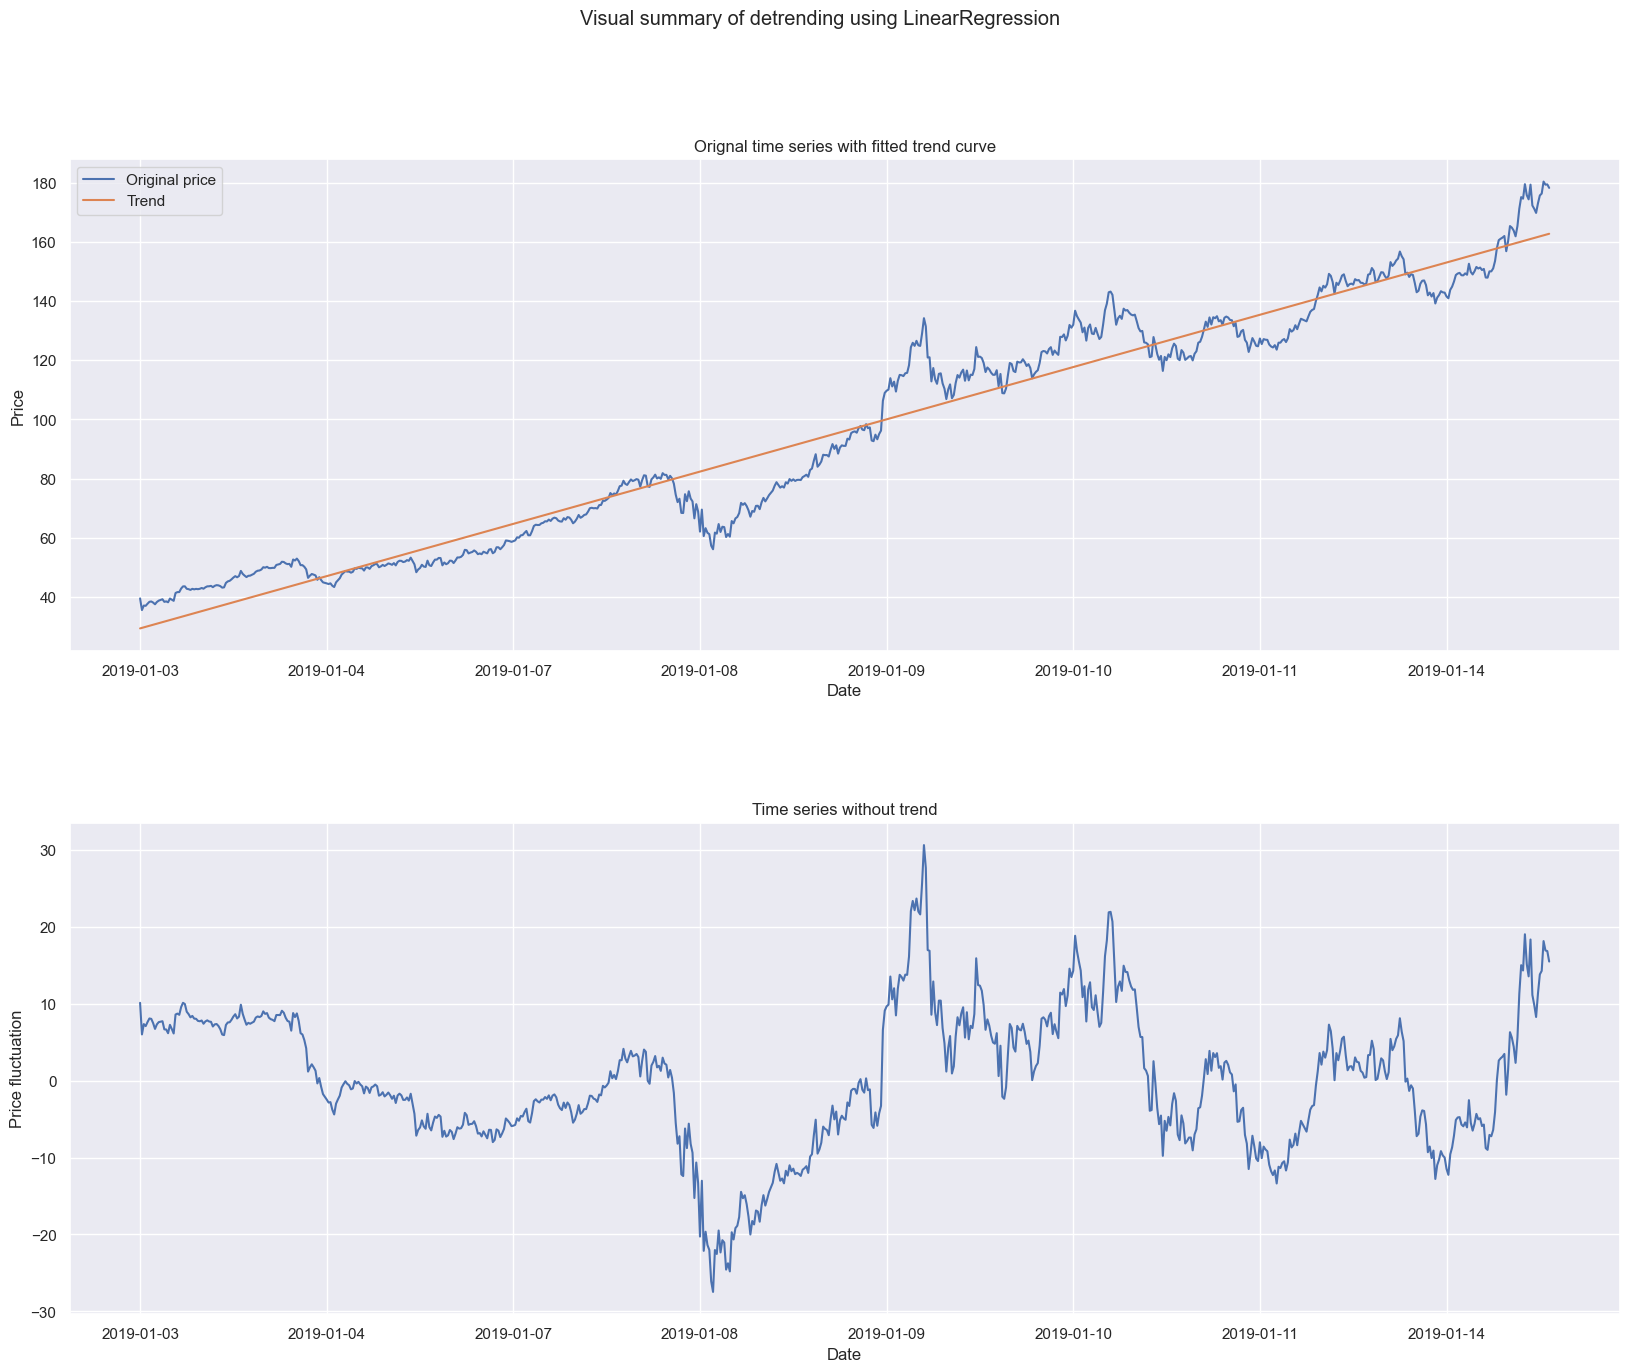

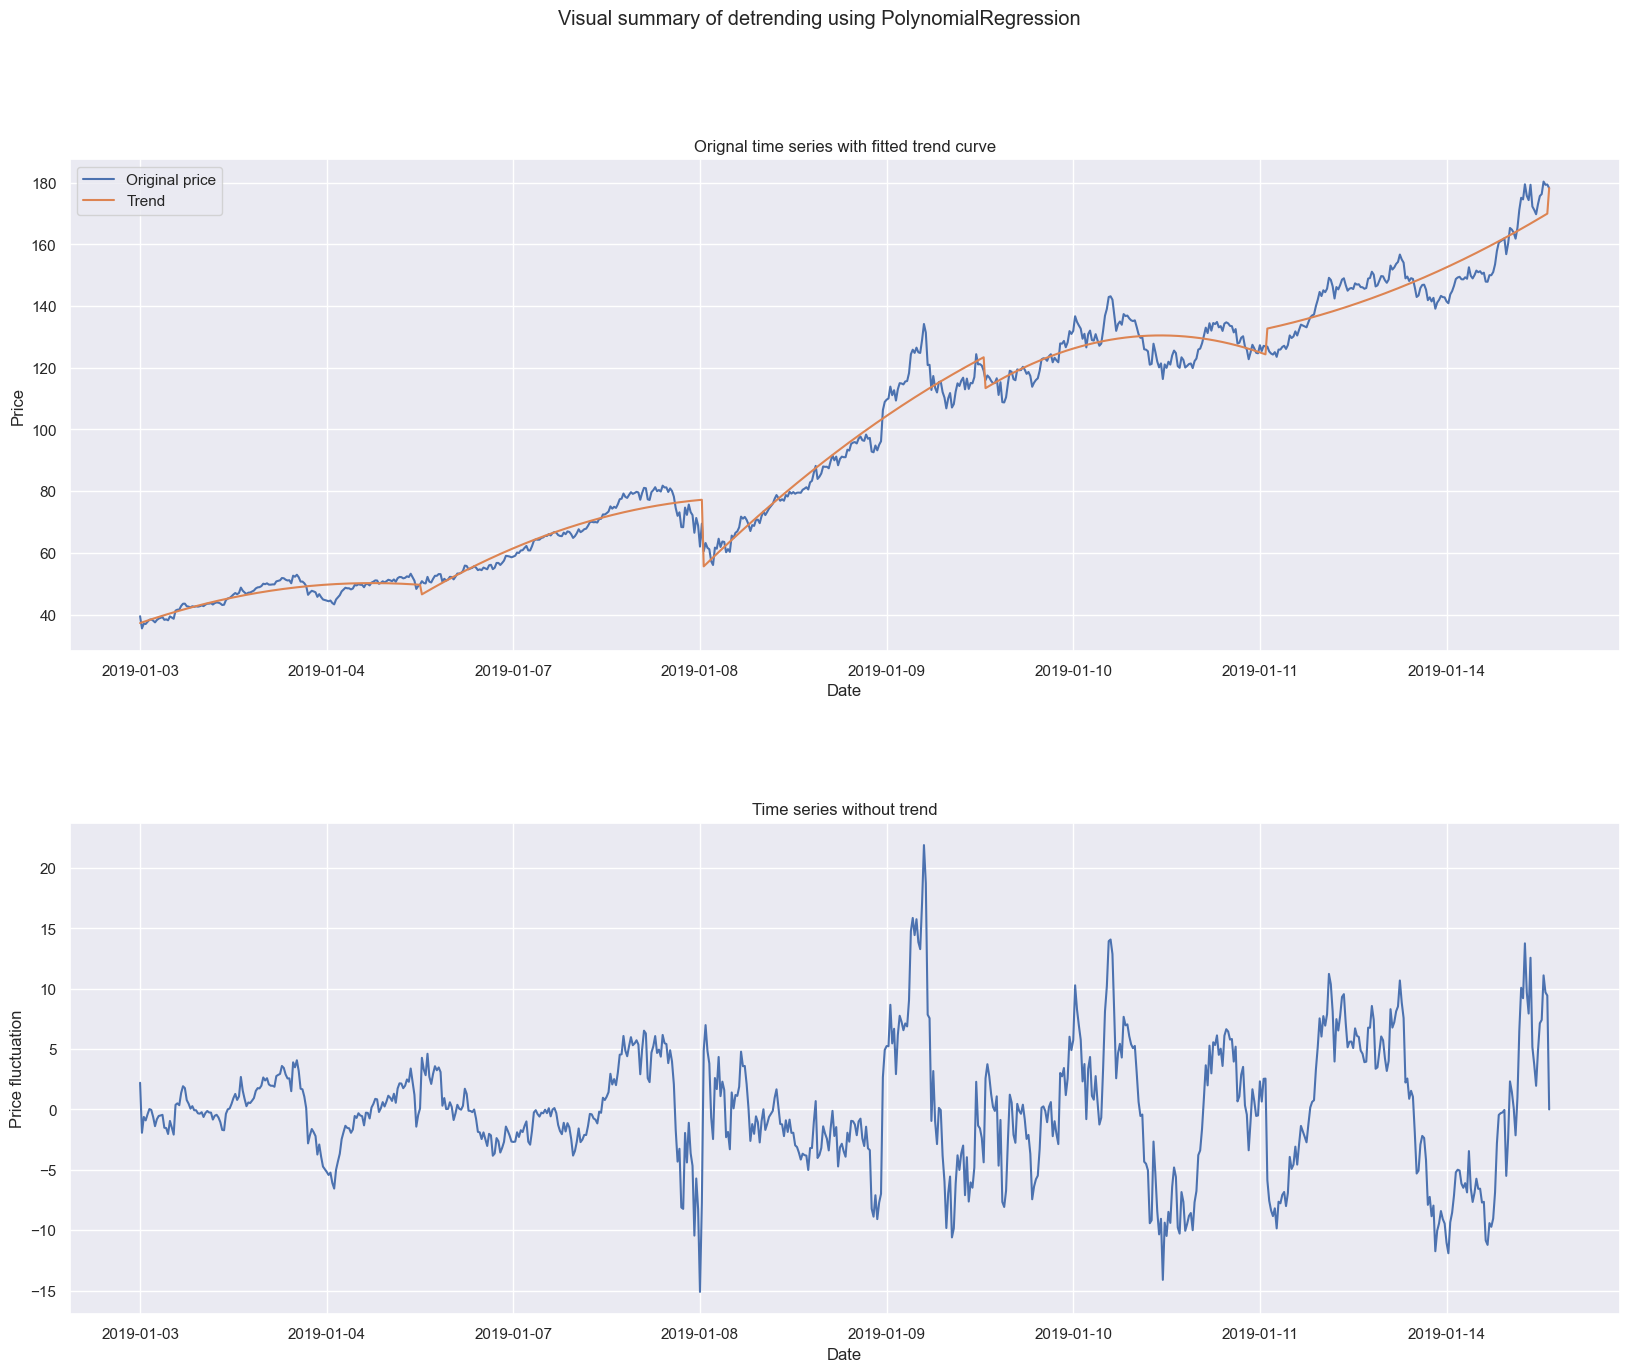

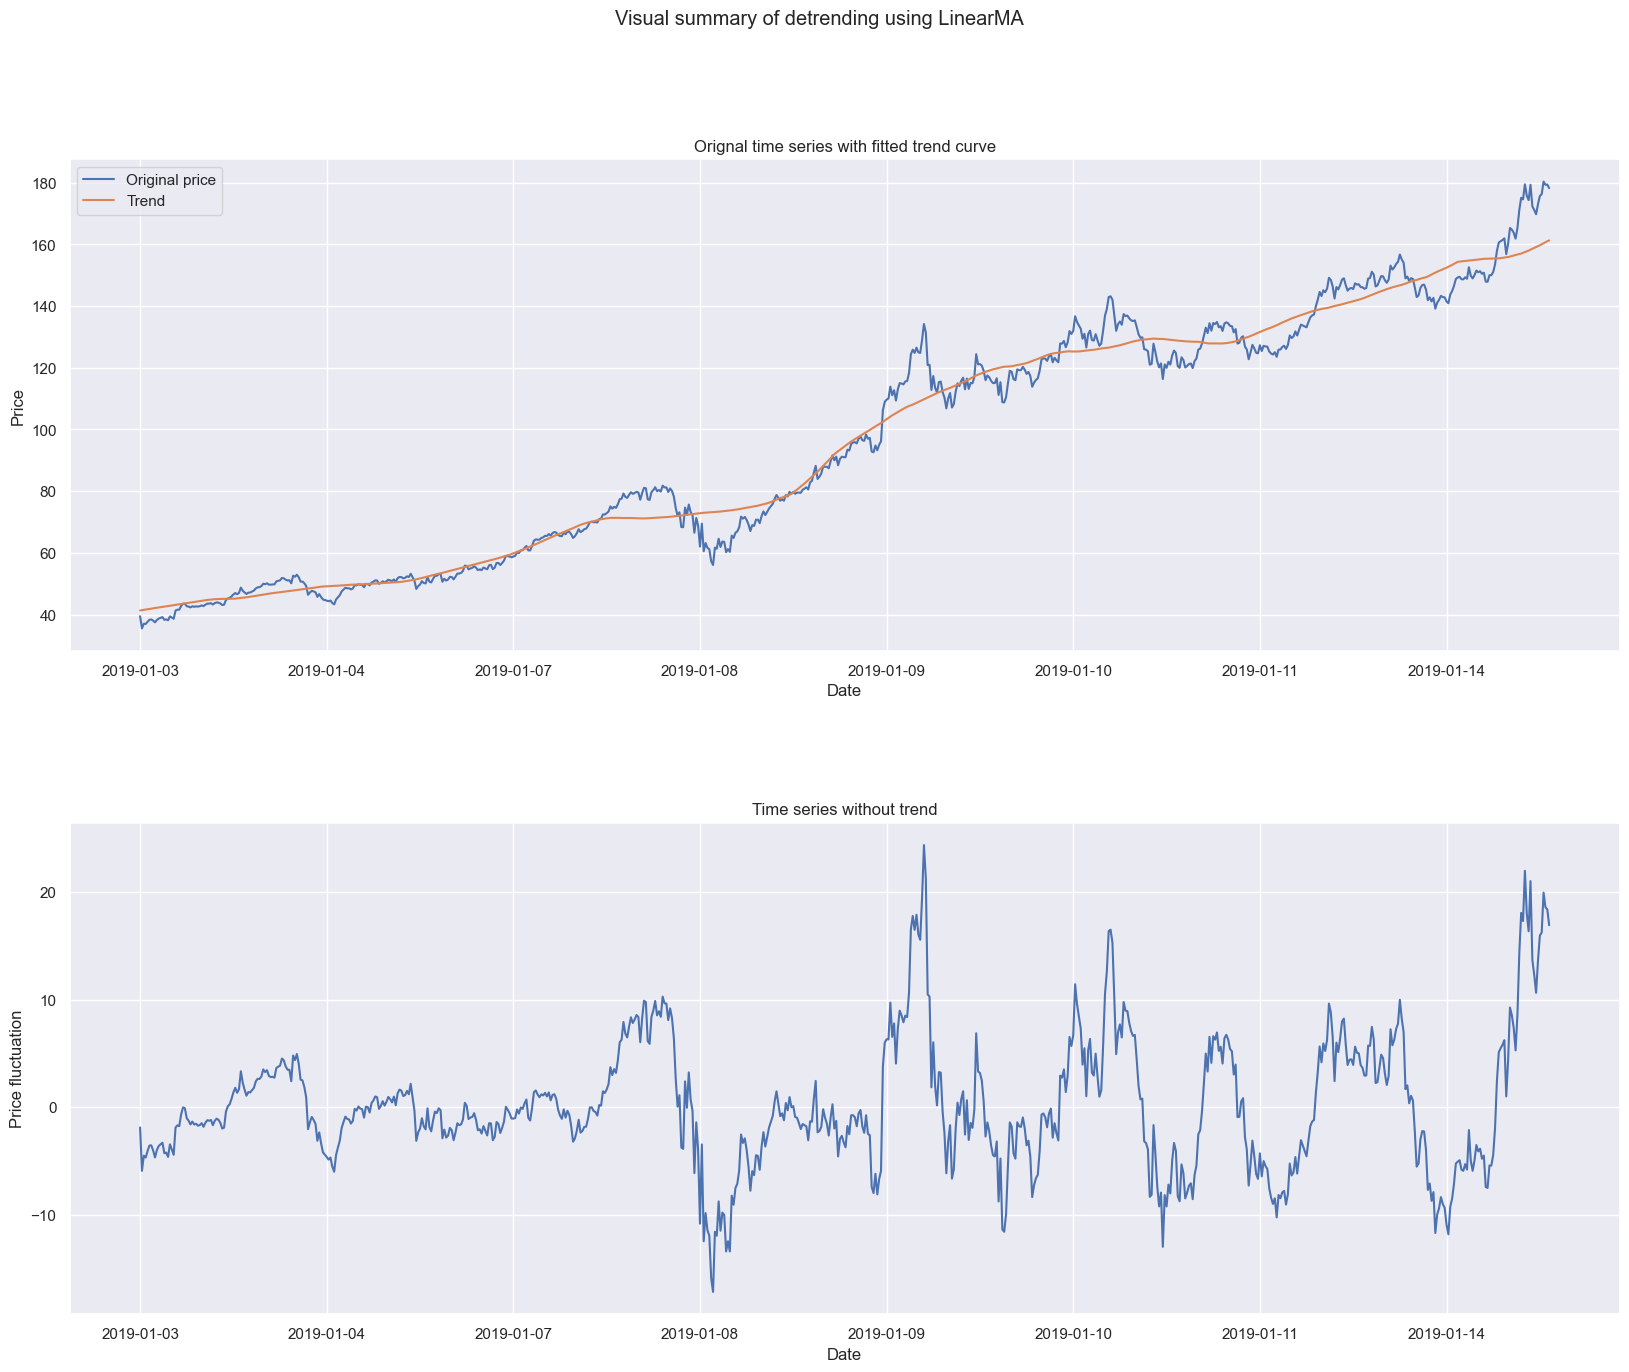

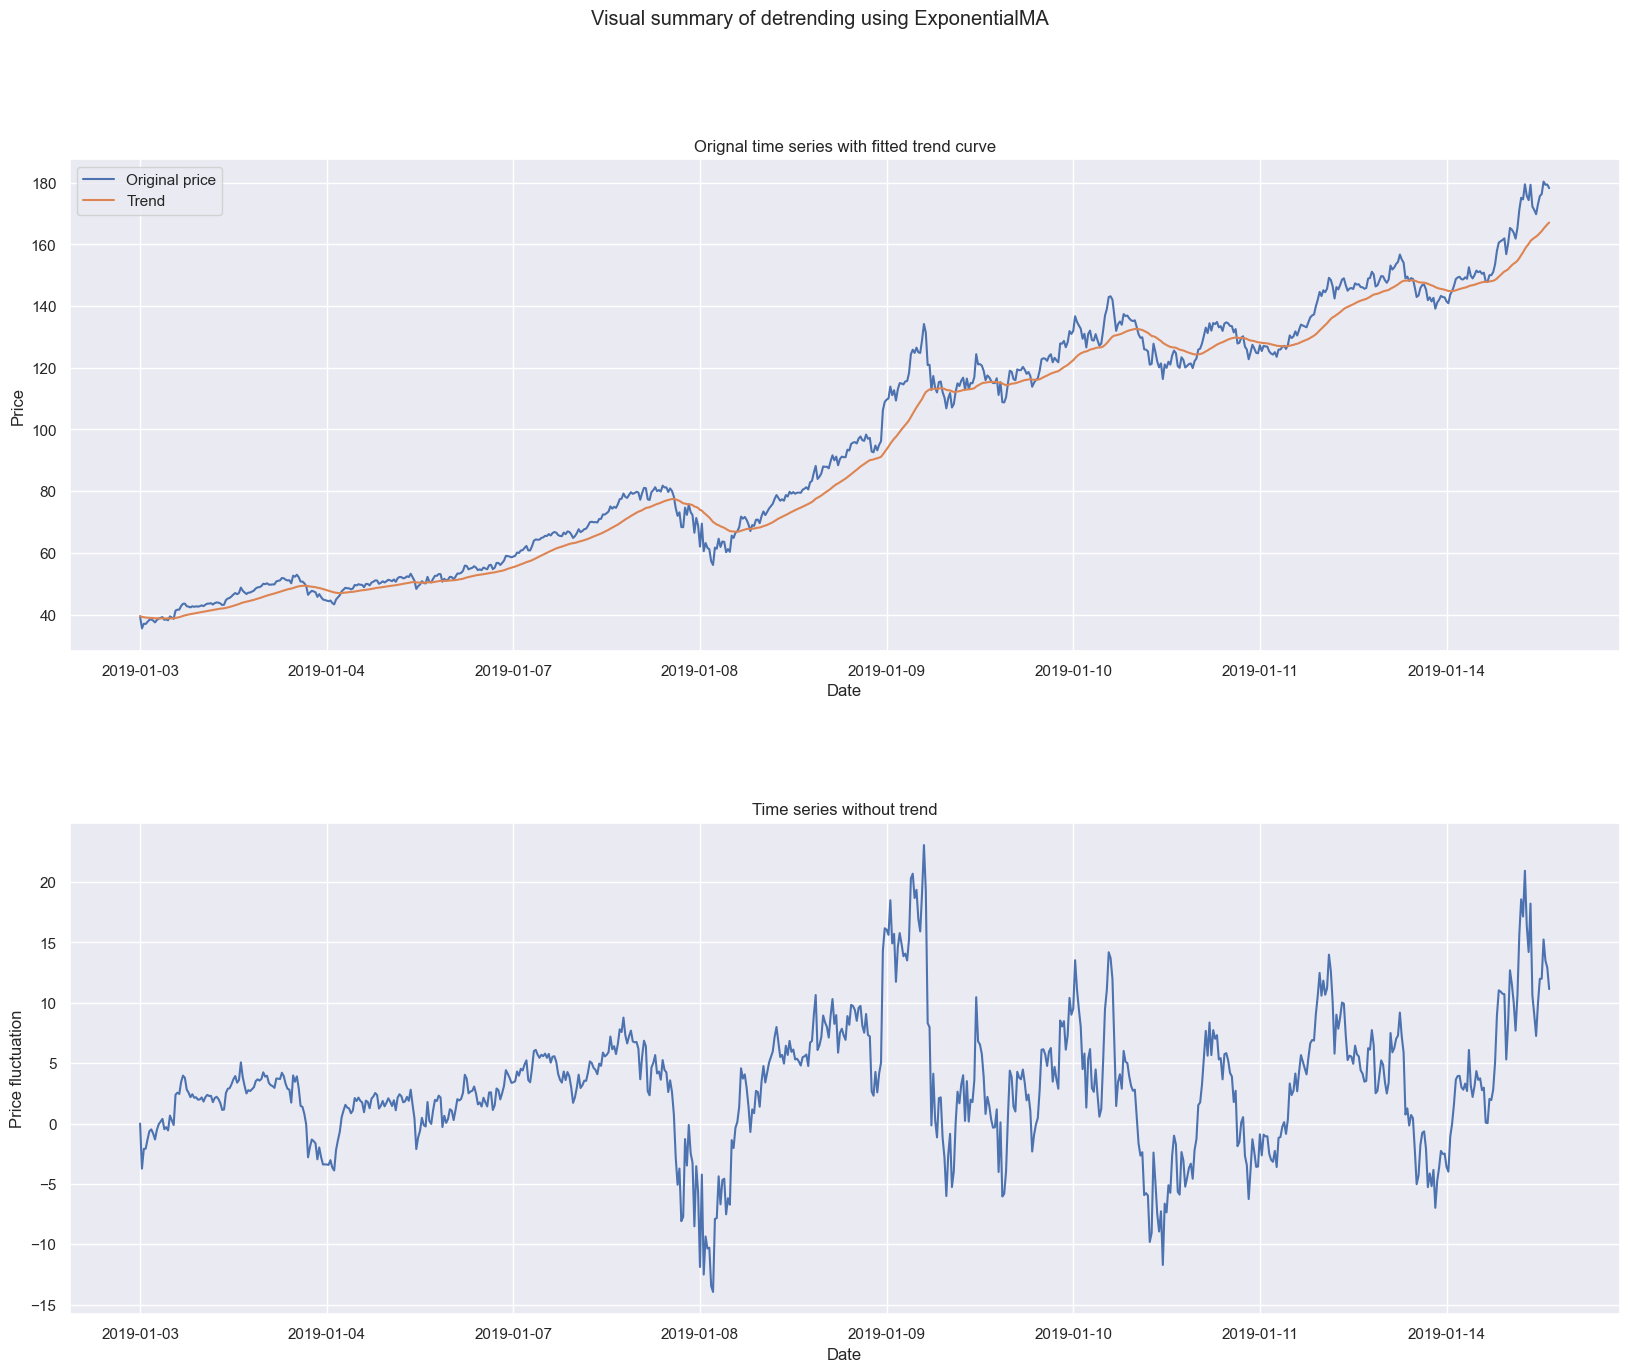

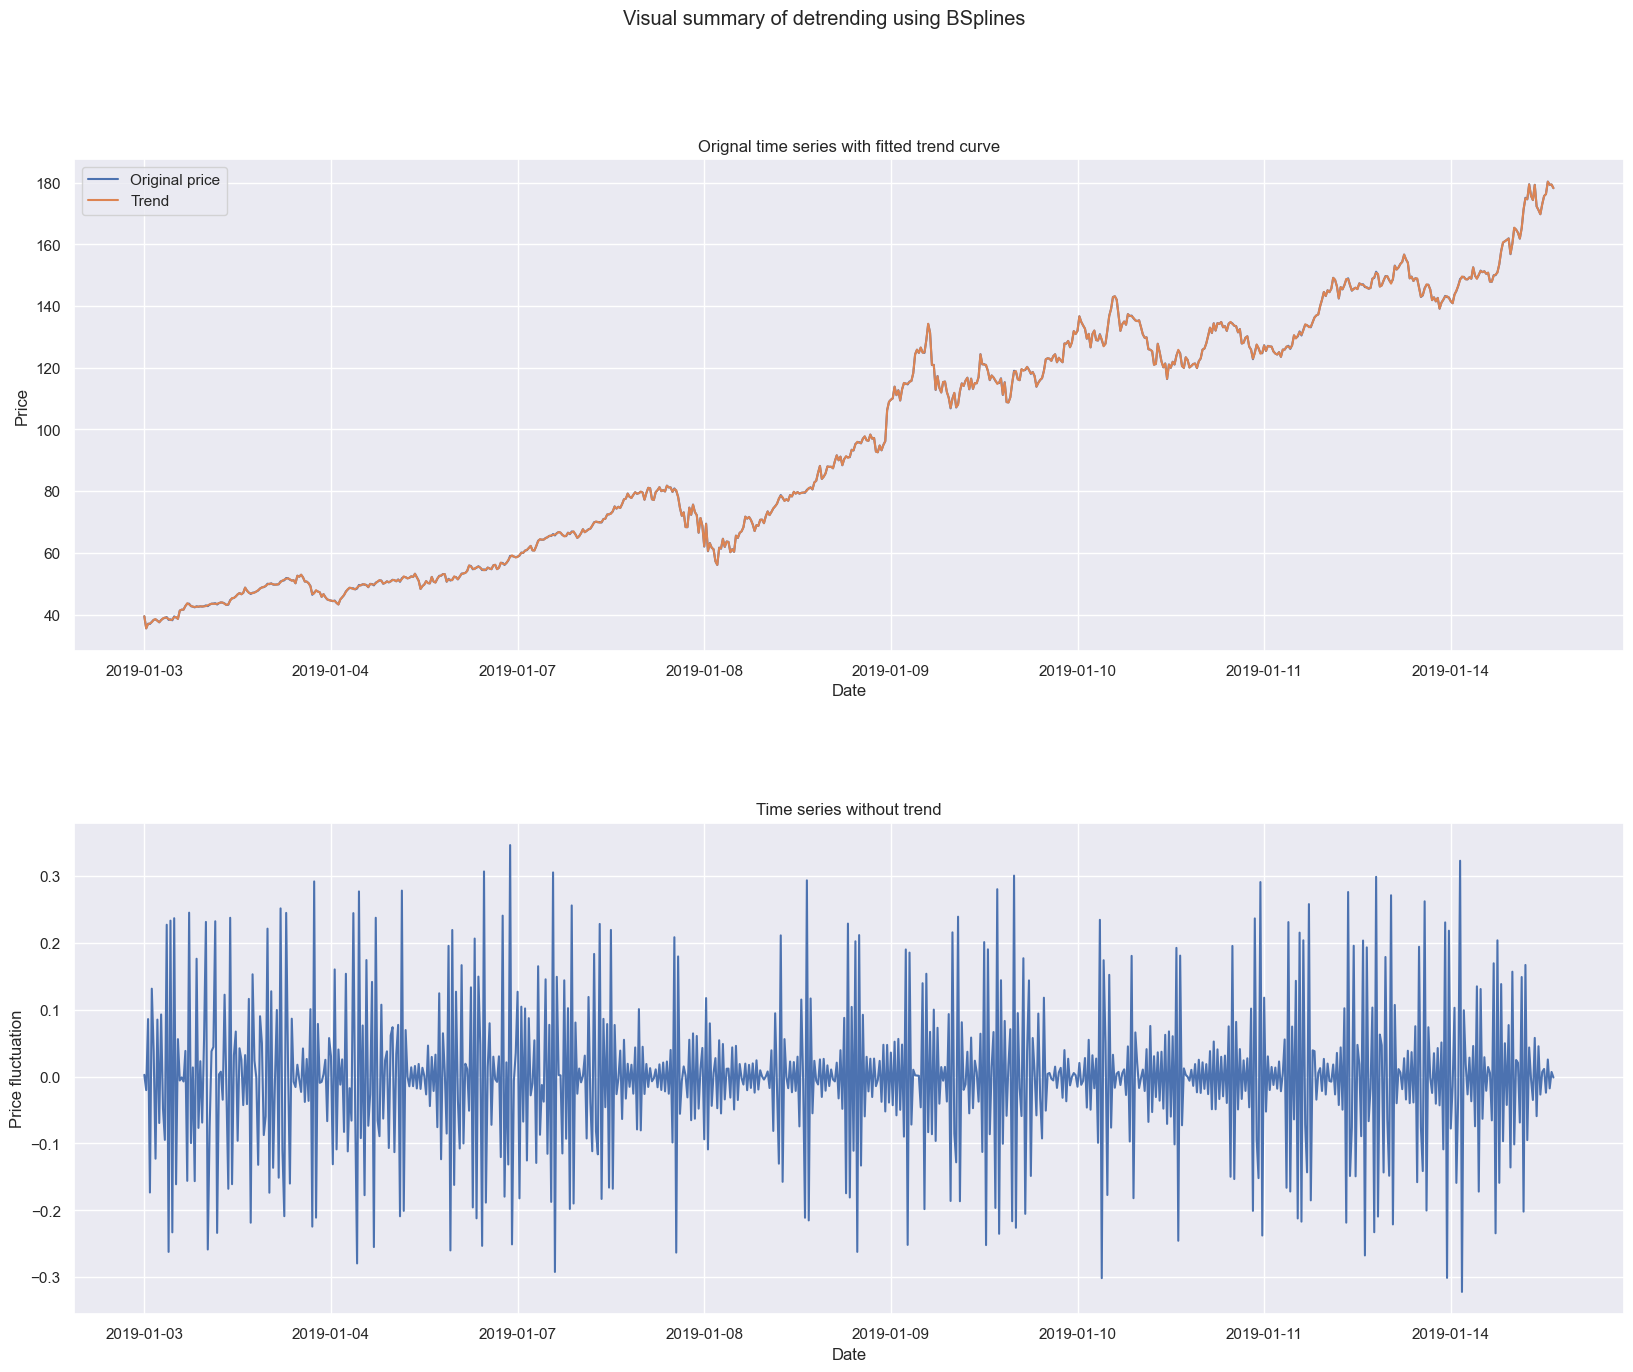

In [4]:
for method in methods:
    detrend_model = detrend(method=method)
    y_fitted = detrend_model.fit(y)
    y_detrend = detrend_model.predict()
    detrend_model.fancy_plot(xticklabels=df.index.strftime("%Y-%m-%d"))